In [133]:
# importing libraries

import importlib
import subprocess
import sys

# if the package is downloaded load it, if not download it
def install_and_import(package, import_name=None):
    if import_name is None:
        import_name = package

    try:
        return importlib.import_module(import_name)
    except ImportError:
        print(f"{import_name} not found, installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        return importlib.import_module(import_name)


pd = install_and_import("pandas")
np = install_and_import("numpy")
plt = install_and_import("matplotlib.pyplot", "matplotlib.pyplot")

In [134]:
# working directory check
# %pwd

In [135]:
# data read
data = pd.read_csv('../data/okm_diak_adat.csv', low_memory = False)
data.head()

,Unnamed: 0,telephely_azonosito,X.x,sorszam_diak,oszt_letszam,tanarok_szama,osztid,tipus,mkod_th,teltip7_th,...,t55e,t56,X.y,tanarok_szama_telephelyen,megye_kodja,telepulestipus,fenntarto_tipuscsoport,diak_osszletszama_telephelyen,egy_diakra_mukodesi_kiadas_eFt_2019,osszes_mukodesi_kiadas_eFt
0,1,2720701,53413,53427,20,25.5,1,1,2,3,...,0.0,2.0,1,25.5,2,3,3,240,795.939575,184657.984375
1,2,2720701,51101,51115,13,25.5,2,1,2,3,...,0.0,3.0,1,25.5,2,3,3,240,795.939575,184657.984375
2,3,2720701,4527,4531,13,25.5,2,1,2,3,...,0.0,5.0,1,25.5,2,3,3,240,795.939575,184657.984375
3,4,2720701,18382,18391,20,25.5,1,1,2,3,...,0.0,3.0,1,25.5,2,3,3,240,795.939575,184657.984375
4,5,2720701,42486,42498,20,25.5,1,1,2,3,...,0.0,4.0,1,25.5,2,3,3,240,795.939575,184657.984375


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72549 entries, 0 to 72548
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           72549 non-null  int64  
 1   telephely_azonosito                  72549 non-null  int64  
 2   X.x                                  72549 non-null  int64  
 3   sorszam_diak                         72549 non-null  int64  
 4   oszt_letszam                         72549 non-null  int64  
 5   tanarok_szama                        67830 non-null  float64
 6   osztid                               72549 non-null  int64  
 7   tipus                                72549 non-null  int64  
 8   mkod_th                              72549 non-null  int64  
 9   teltip7_th                           72549 non-null  int64  
 10  ft_csop                              72549 non-null  int64  
 11  matek_8                     

In [137]:
# renaming some coloumns, based on the provided file description 
data.rename(columns={
    'Unnamed: 0': 'row_numbering',
    'X.x': 'id_of_students',
    'X.y': 'id_of_schools'
}, inplace=True)

In [138]:
# correlation between our two independent variables
print("Correlation between maths_8 points and reading_8 points:", data['matek_8'].corr(data['szovegert_8']))
print("Correlation between maths_8 points and maths_6 points:", data['matek_8'].corr(data['matek_6']))
print("Correlation between reading_8 points and reading_6 points:", data['szovegert_8'].corr(data['szovegert_6']))

Correlation between maths_8 points and reading_8 points: 0.7336084305187149
Correlation between maths_8 points and maths_6 points: 0.7723932665012557
Correlation between reading_8 points and reading_6 points: 0.791598800234569


In [139]:
# there are lot of variables with missing values

In [140]:
# threshold for the proportion of missing values above which we remove the variable
na_ratio=0.1

# theoretical NA proportion above which dropping a variable may be worth considering
percentage_of_NA=0.05

5% of the dataframe length (red line): 3289.8 (just for help deciding which variables to use)



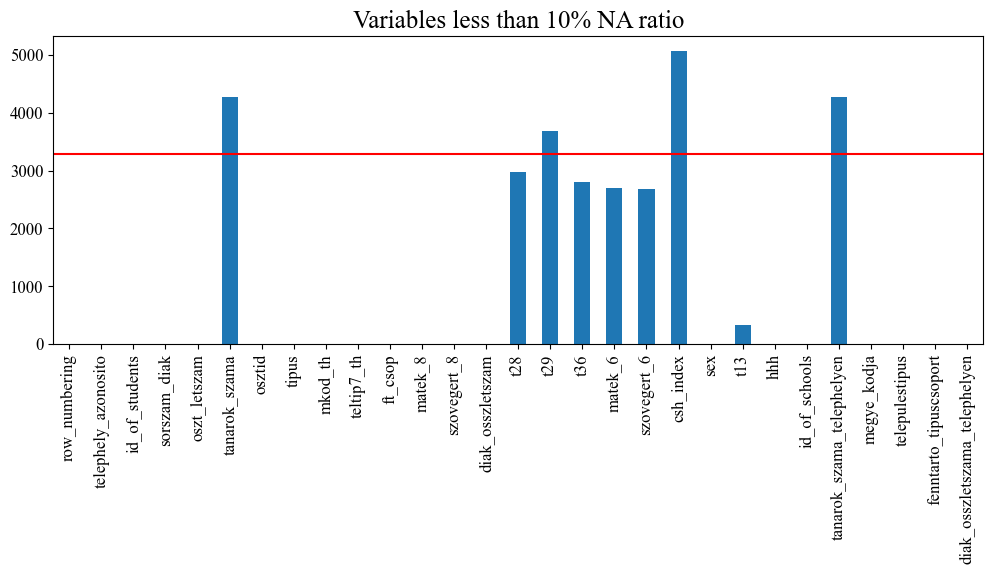

In [141]:
# data read once again so rerunning this chunk with different NA ratio wont influence the database
data = pd.read_csv('../data/okm_diak_adat.csv', low_memory = False)
data.rename(columns={
    'Unnamed: 0': 'row_numbering',
    'X.x': 'id_of_students',
    'X.y': 'id_of_schools'
}, inplace=True)

# omitting all NAs in our independent variables
data = data.dropna(subset=['matek_8',"szovegert_8"])

# dropingp columns from df where the proportion of missing values (NaN) is higher than 'ratio' (default: 0.60 = 60%).
def remove_highnan(df,ratio):
  for i in df.columns:
    if df[i].isnull().mean() > ratio:
      df.drop(i,axis = 1,inplace = True) # if its more than 0.6 ratio of Nas, drop the column

remove_highnan(data, na_ratio)

print(f"{percentage_of_NA:.0%} of the dataframe length (red line):", round(len(data)*percentage_of_NA,1), "(just for help deciding which variables to use)")
print()
data.isnull().sum().plot(kind = 'bar', fontsize = 12,figsize = (12,4))
plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)
plt.axhline(y=len(data)*percentage_of_NA, color='red')
plt.show()

In [142]:
print("Available features after filtering NAs:")
print("-----")
for col in data.columns:
    print(col)
print("-----")    

Available features after filtering NAs:
-----
row_numbering
telephely_azonosito
id_of_students
sorszam_diak
oszt_letszam
tanarok_szama
osztid
tipus
mkod_th
teltip7_th
ft_csop
matek_8
szovegert_8
diak_osszletszam
t28
t29
t36
matek_6
szovegert_6
csh_index
sex
t13
hhh
id_of_schools
tanarok_szama_telephelyen
megye_kodja
telepulestipus
fenntarto_tipuscsoport
diak_osszletszama_telephelyen
-----


In [143]:
# filtering for duplicates and not useful features

In [144]:
# are the 2 number of teacher features equal?
tmp = data.dropna(subset=["tanarok_szama", "tanarok_szama_telephelyen"])
print(len(tmp["tanarok_szama"] == tmp["tanarok_szama_telephelyen"]))
print(sum(tmp["tanarok_szama"] == tmp["tanarok_szama_telephelyen"]))
# all rows are the same, then drop one

61516
61516


In [145]:
# are the 2 number of student features equal?
tmp = data.dropna(subset=["diak_osszletszam", "diak_osszletszama_telephelyen"])
print(len(tmp["diak_osszletszam"] == tmp["diak_osszletszama_telephelyen"]))
print(sum(tmp["diak_osszletszam"] == tmp["diak_osszletszama_telephelyen"]))
# all rows are the same, then drop one

65795
65795


In [146]:
data.drop(columns=["diak_osszletszama_telephelyen",
                   "tanarok_szama_telephelyen"],
          inplace=True)

In [147]:
# renaming the coloumns
data.rename(columns={
    # already partly English but make them consistent
    'row_numbering': 'row_number',
    'id_of_students': 'student_id',
    'id_of_schools': 'school_id',

    # IDs, structure
    'telephely_azonosito': 'site_id_(telephely)',      # school site identifier (campus/site)
    'sorszam_diak': 'student_serial_number',           # internal student serial number
    'osztid': 'class_id',
    'oszt_letszam': 'class_size',

    # teacher & student counts
    'tanarok_szama': 'teachers_number_site',           # number of teachers at the site
    'diak_osszletszam': 'total_students_site',         # total number of students at the site

    # geography / school context
    'mkod_th': 'county_code_site',                     # county code at site level
    'megye_kodja': 'county_code_school',               # county code at school level
    'teltip7_th': 'settlement_type_site',              # settlement type of the site
    'telepulestipus': 'settlement_type_school',        # settlement type of the school
    'ft_csop': 'maintainer_type_group',                # maintainer type group (code)
    'fenntarto_tipuscsoport': 'maintainer_type_group_school',  # maintainer type group at school level
    'tipus': 'school_type',                            # type of school

    # test scores (standardized)
    'matek_8': 'math_score_8_std',                     # standardized math score, grade 8
    'szovegert_8': 'reading_score_8_std',              # standardized reading score, grade 8
    'matek_6': 'math_score_6_std',                     # standardized math score, grade 6
    'szovegert_6': 'reading_score_6_std',              # standardized reading score, grade 6

    # family background
    't28': 'mother_education_level',                   # mother’s or female guardian’s highest education
    't29': 'father_education_level',                   # father’s or male guardian’s highest education
    't36': 'books_at_home',                            # number of books at home (categories)
    'csh_index': 'family_background_index_std',        # standardized family background index

    # student-level attributes
    'sex': 'student_gender',                           # student gender (coded)
    't13': 'class_curriculum_type',                    # type of curriculum of the student’s class
    'hhh': 'multiplied_disadvantaged'                    # student is multiply disadvantaged (binary)
}, inplace=True)

In [148]:
data.head()

,row_number,site_id_(telephely),student_id,student_serial_number,class_size,teachers_number_site,class_id,school_type,county_code_site,settlement_type_site,...,math_score_6_std,reading_score_6_std,family_background_index_std,student_gender,class_curriculum_type,multiplied_disadvantaged,school_id,county_code_school,settlement_type_school,maintainer_type_group_school
0,1,2720701,53413,53427,20,25.5,1,1,2,3,...,0.393296,0.692302,0.731792,0,6.0,0,1,2,3,3
1,2,2720701,51101,51115,13,25.5,2,1,2,3,...,-0.058684,-0.161057,-1.247200,0,1.0,1,1,2,3,3
2,3,2720701,4527,4531,13,25.5,2,1,2,3,...,-1.580298,-1.841218,-1.915730,1,1.0,1,1,2,3,3
3,4,2720701,18382,18391,20,25.5,1,1,2,3,...,-0.036751,-0.786757,-0.551291,0,6.0,0,1,2,3,3
4,5,2720701,42486,42498,20,25.5,1,1,2,3,...,-0.410080,-0.738254,0.949264,1,6.0,0,1,2,3,3


In [149]:
# filtering again for duplicates and not useful features

In [150]:
# we dont need these (dont have useful information )
print(data['row_number'].nunique())
print(data['student_id'].nunique())
print(data['student_serial_number'].nunique())

65795
65795
65795


In [151]:
print(data['school_id'].nunique())
print(data['site_id_(telephely)'].nunique())

2381
2381


In [152]:
print(data['county_code_site'].nunique())
print(data['county_code_school'].nunique())

20
20


In [153]:
print(data['settlement_type_site'].nunique())
print(data['settlement_type_school'].nunique())

7
7


In [154]:
print(data['maintainer_type_group'].nunique())
print(data['maintainer_type_group_school'].nunique())

5
5


In [155]:
print(data['school_type'].nunique())  # no useful information

1


In [156]:
print(data['class_id'].nunique()) # also just an unnecessary feature

8


In [157]:
# removing the unnecessary features
cols_to_drop = [
    'row_number',            # row number 
    'student_id',            # student_id
    'student_serial_number', # student_serial_number
    'school_id',             # school_id
    'county_code_site',      # county_code at site level
    'settlement_type_site',  # settlement_type_site
    'maintainer_type_group', # maintainer_type_group
    'school_type',           # school_type
    'class_id',               # class_id
    'reading_score_8_std',   # we dont use these scores, since we focusing on 8th grade maths
    'math_score_6_std',                   
    'reading_score_6_std', 
]

data = data.drop(columns=cols_to_drop, errors='ignore')

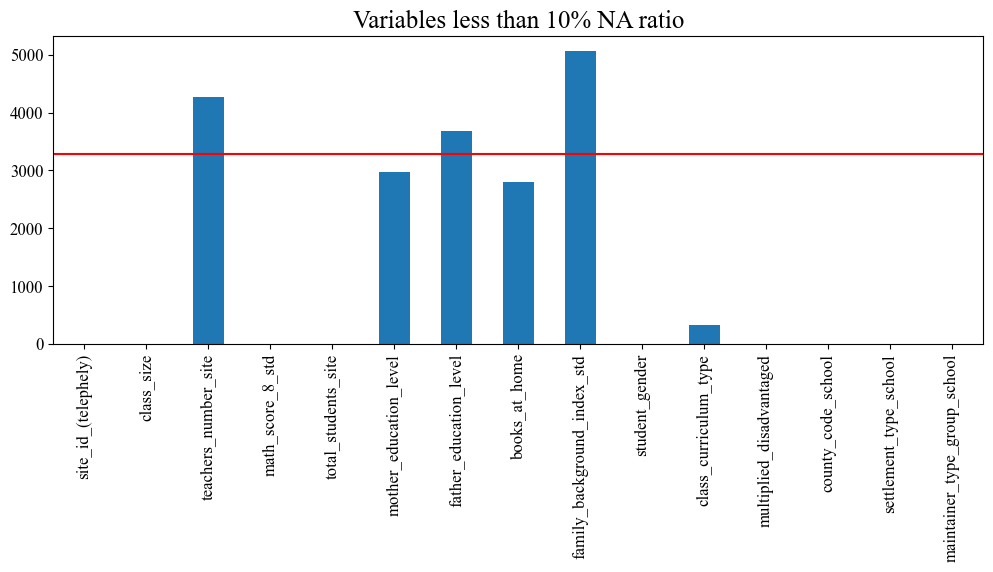

In [158]:
data.isnull().sum().plot(kind = 'bar', fontsize = 12,figsize = (12,4))
plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)
plt.axhline(y=len(data)*percentage_of_NA, color='red')
plt.show()

In [159]:
# saving the plot
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12   # base font size

data.isnull().sum().plot(kind='bar', fontsize=12, figsize=(12, 4))

plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)

# extra comment inside the plot
plt.text(
    x=-0.3,
    y=len(data)*percentage_of_NA + 1650,
    s='Blue bars = number of NAs',
    ha='left',
    fontsize=12,              # comment font size
    fontfamily='Times New Roman'
)

# saving
plt.savefig('../figures/na_plot.png', dpi=300, bbox_inches='tight')
plt.close()

In [160]:
data.head()

,site_id_(telephely),class_size,teachers_number_site,math_score_8_std,total_students_site,mother_education_level,father_education_level,books_at_home,family_background_index_std,student_gender,class_curriculum_type,multiplied_disadvantaged,county_code_school,settlement_type_school,maintainer_type_group_school
0,2720701,20,25.5,0.059560,240,4.0,7.0,5.0,0.731792,0,6.0,0,2,3,3
1,2720701,13,25.5,-0.001199,240,4.0,4.0,1.0,-1.247200,0,1.0,1,2,3,3
2,2720701,13,25.5,-1.992139,240,2.0,1.0,1.0,-1.915730,1,1.0,1,2,3,3
3,2720701,20,25.5,0.002098,240,3.0,4.0,3.0,-0.551291,0,6.0,0,2,3,3
4,2720701,20,25.5,0.165419,240,6.0,4.0,7.0,0.949264,1,6.0,0,2,3,3


In [161]:
# dropping NAs
data = data.dropna()

In [162]:
# manual type specification for each variable
dtype_spec = {
    "site_id_telephely":          "category",  # school site ID (identifier)
    "class_size":                 "int",       # number of students in the class
    "teachers_number_site":       "float",       # number of teachers at the site
    "math_score_8_std":           "float",     # standardized math score (grade 8)
    "total_students_site":        "int",       # total number of students at the site
    "mother_education_level":     "category",  # coded education level -> categorical
    "father_education_level":     "category",
    "books_at_home":              "category",  # coded categories (0–50, 50–150, etc.)
    "family_background_index_std":"float",     # continuous index
    "student_gender":             "category",  # boy/girl
    "class_curriculum_type":      "category",  # normal / bilingual / specialized / nationality
    "multiply_disadvantaged":     "category",  # yes / no (binary factor)
    "county_code_school":         "category",  # region code – categorical, not numeric scale
    "settlement_type_school":     "category",  # Budapest / town / village, etc.
    "maintainer_type_group_school":"category"  # state / church / private, etc.
}

for col, kind in dtype_spec.items():
    if col not in data.columns:
        print(f"Warning: column '{col}' not found in data")
        continue

    if kind == "category":
        data[col] = data[col].astype("category")

    elif kind == "int":
        # convert to numeric then to nullable integer
        data[col] = pd.to_numeric(data[col], errors="coerce").astype("Int64")

    elif kind == "float":
        data[col] = pd.to_numeric(data[col], errors="coerce")

# quick check
print(data.dtypes)

site_id_(telephely)                int64
class_size                         Int64
teachers_number_site             float64
math_score_8_std                 float64
total_students_site                Int64
mother_education_level          category
father_education_level          category
books_at_home                   category
family_background_index_std      float64
student_gender                  category
class_curriculum_type           category
multiplied_disadvantaged           int64
county_code_school              category
settlement_type_school          category
maintainer_type_group_school    category
dtype: object


In [163]:
data["books_at_home"].unique() # check is there is NA -> no NA

[5.0, 1.0, 3.0, 7.0, 4.0, 2.0, 6.0]
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [164]:
edu_map = {
    1: "less_than_primary",       # kevesebb mint 8 általános
    2: "primary_school",          # általános iskola
    3: "vocational_school",       # szakiskola
    4: "apprenticeship_school",   # szakmunkásképző
    5: "secondary_with_matura",   # érettségi
    6: "college",                 # főiskola
    7: "university"               # egyetem
}

books_map = {
    1: "0_50",                    # kb 0–50
    2: "around_50",               # kb 50
    3: "up_to_150",               # max 150
    4: "up_to_300",               # max 300
    5: "300_600",                 # 300–600
    6: "600_1000",                # 600–1000
    7: "more_than_1000"           # 1000-nél több
}

gender_map = {
    0: "boy",                     # fiú
    1: "girl"                     # lány
}

curriculum_map = {
    1: "normal",                  # normál
    2: "bilingual",               # két tannyelvű
    3: "specialized",             # tagozatos
    6: "nationality"              # nemzetiségi
}

hhh_map = {
    0: "no",                      # nem
    1: "yes"                      # igen
}

settlement_map = {
    1: "Budapest",
    2: "county_seat",
    3: "town",
    4: "village_under_5000",
    5: "village_2000_5000",
    6: "village_1000_2000",
    7: "village_under_1000"
}

maintainer_map = {
    2: "local_municipality",      # települési/kerületi önkormányzat
    3: "central_government_state",# központi költségvetés/állami
    4: "church",                  # egyházi
    5: "foundation_private",      # alapítvány/magán
    6: "other"                    # egyéb
}

# --- apply maps --- 

# mother & father education
for col in ["mother_education_level", "father_education_level"]:
    if col in data.columns:
        tmp = pd.to_numeric(data[col], errors="coerce")
        data[col] = tmp.map(edu_map).astype("category")

# books at home
if "books_at_home" in data.columns:
    tmp = pd.to_numeric(data["books_at_home"], errors="coerce")
    data["books_at_home"] = tmp.map(books_map).astype("category")

# student gender
if "student_gender" in data.columns:
    tmp = pd.to_numeric(data["student_gender"], errors="coerce")
    data["student_gender"] = tmp.map(gender_map).astype("category")

# class curriculum type
if "class_curriculum_type" in data.columns:
    tmp = pd.to_numeric(data["class_curriculum_type"], errors="coerce")
    data["class_curriculum_type"] = tmp.map(curriculum_map).astype("category")

# multiplied_disadvantaged (hhh) – currently int64
if "multiplied_disadvantaged" in data.columns:
    tmp = pd.to_numeric(data["multiplied_disadvantaged"], errors="coerce")
    data["multiplied_disadvantaged"] = tmp.map(hhh_map).astype("category")

# settlement type of school
if "settlement_type_school" in data.columns:
    tmp = pd.to_numeric(data["settlement_type_school"], errors="coerce")
    data["settlement_type_school"] = tmp.map(settlement_map).astype("category")

# maintainer type group at school level
if "maintainer_type_group_school" in data.columns:
    tmp = pd.to_numeric(data["maintainer_type_group_school"], errors="coerce")
    data["maintainer_type_group_school"] = tmp.map(maintainer_map).astype("category")

# county_code_school: keep as categorical codes (no full county-name map in codebook snippet)
if "county_code_school" in data.columns:
    data["county_code_school"] = data["county_code_school"].astype("category")

In [165]:
for c in ["mother_education_level", "father_education_level",
          "books_at_home", "student_gender",
          "class_curriculum_type", "multiplied_disadvantaged",
          "settlement_type_school", "maintainer_type_group_school"]:
    if c in data.columns:
        print("\n", c)
        print(data[c].value_counts(dropna=False))


 mother_education_level
mother_education_level
secondary_with_matura    17920
apprenticeship_school    11629
college                  10284
primary_school            7852
university                4719
vocational_school         3133
less_than_primary         1053
Name: count, dtype: int64

 father_education_level
father_education_level
apprenticeship_school    20947
secondary_with_matura    14037
primary_school            7061
college                   5998
university                4824
vocational_school         2927
less_than_primary          796
Name: count, dtype: int64

 books_at_home
books_at_home
up_to_150         13137
0_50              11491
around_50          9130
up_to_300          8288
300_600            6863
600_1000           4556
more_than_1000     3125
Name: count, dtype: int64

 student_gender
student_gender
boy     28591
girl    27999
Name: count, dtype: int64

 class_curriculum_type
class_curriculum_type
normal         44005
specialized     6216
nationality     3719

In [166]:
# descriptive stats for numerical features 
# select only numeric columns
num_data = data.select_dtypes(include=[np.number])

# get descriptive statistics
desc = num_data.describe().T.round(2)  # transpose so variables are rows

print(desc)

                               count            mean             std  \
site_id_(telephely)          56590.0  7887429.304913  7456359.710423   
class_size                   56590.0       20.618466         5.16476   
teachers_number_site         56590.0       34.324496       16.740918   
math_score_8_std             56590.0       -0.079734        0.970671   
total_students_site          56590.0      352.590334      194.740335   
family_background_index_std  56590.0       -0.136739        0.987315   

                                   min        25%        50%         75%  \
site_id_(telephely)          2720701.0  3147401.0  3509501.0  20048601.0   
class_size                         1.0       17.0       21.0        25.0   
teachers_number_site               0.0      19.75      33.25        45.0   
math_score_8_std              -3.46568  -0.737616  -0.033463    0.609106   
total_students_site                0.0      188.0      334.0       473.0   
family_background_index_std  -3.168971 

In [167]:
# filter those errors where the teacher and student number are zero
data = data[~((data['total_students_site'] == 0) |
              (data['teachers_number_site'] == 0))]

In [168]:
len(data) # 56590 -> 56569 21 obs

56569

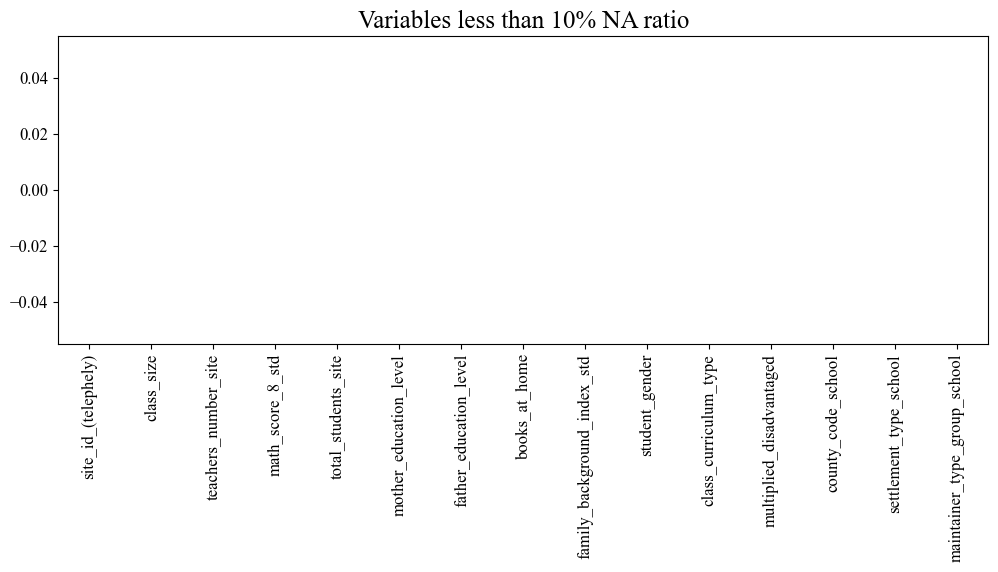

In [169]:
data.isnull().sum().plot(kind = 'bar', fontsize = 12,figsize = (12,4))
plt.title(f'Variables less than {na_ratio:.0%} NA ratio', fontsize=18)
plt.show()

In [170]:
# creating a student/teacher ratio, because we think that is more informative
data["student_teacher_ratio"] = data["total_students_site"] / data["teachers_number_site"]

# drop the original columns
data = data.drop(columns=["total_students_site", "teachers_number_site"])

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56569 entries, 0 to 72467
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   site_id_(telephely)           56569 non-null  int64   
 1   class_size                    56569 non-null  Int64   
 2   math_score_8_std              56569 non-null  float64 
 3   mother_education_level        56569 non-null  category
 4   father_education_level        56569 non-null  category
 5   books_at_home                 56569 non-null  category
 6   family_background_index_std   56569 non-null  float64 
 7   student_gender                56569 non-null  category
 8   class_curriculum_type         56569 non-null  category
 9   multiplied_disadvantaged      56569 non-null  category
 10  county_code_school            56569 non-null  category
 11  settlement_type_school        56569 non-null  category
 12  maintainer_type_group_school  56569 non-null  categ

In [172]:
data.head()

,site_id_(telephely),class_size,math_score_8_std,mother_education_level,father_education_level,books_at_home,family_background_index_std,student_gender,class_curriculum_type,multiplied_disadvantaged,county_code_school,settlement_type_school,maintainer_type_group_school,student_teacher_ratio
0,2720701,20,0.059560,apprenticeship_school,university,300_600,0.731792,boy,nationality,no,2,town,central_government_state,9.411765
1,2720701,13,-0.001199,apprenticeship_school,apprenticeship_school,0_50,-1.247200,boy,normal,yes,2,town,central_government_state,9.411765
2,2720701,13,-1.992139,primary_school,less_than_primary,0_50,-1.915730,girl,normal,yes,2,town,central_government_state,9.411765
3,2720701,20,0.002098,vocational_school,apprenticeship_school,up_to_150,-0.551291,boy,nationality,no,2,town,central_government_state,9.411765
4,2720701,20,0.165419,college,apprenticeship_school,more_than_1000,0.949264,girl,nationality,no,2,town,central_government_state,9.411765


In [175]:
seed = 314+133+76223+3+5
np.random.seed(seed)

# 90% random sample for analysis
filtered_data_anal = data.sample(frac=0.9, random_state=seed)

# remaining 10% for final evaluation
filtered_data_eval = data.drop(filtered_data_anal.index)

# write to CSVs
filtered_data_anal.to_csv('../data/filtered_data_anal.csv', index=False)
filtered_data_eval.to_csv('../data/filtered_data_eval.csv', index=False)